In [1]:
%%HTML
<style>
@import url('https://fonts.googleapis.com/css?family=K2D:500,500i,600,600i');
body {
    font-family: "K2D", calibri;
}
.tg  {border-collapse:collapse;border-spacing:0;border-color:#ccc;}
.tg td{font-size:14px;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#fff;}
.tg th{ffont-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:0px;overflow:hidden;word-break:normal;border-color:#ccc;color:#333;background-color:#f0f0f0;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
.tg .tg-btxf{background-color:#f9f9f9;border-color:inherit;text-align:left;vertical-align:top}
</style> 

<p style="font-size: 40px;font-family: 'K2D',calibri; text-align: center; margin: 10px; color: #EE1C2F">Titanic: Machine Learning from Disaster</p>
<hr>
<div style="float: left; margin: 0 20px 0 10px; width: 50%;">
<iframe style="width: 100%" height="325" src="https://www.youtube.com/embed/9xoqXVjBEF8" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>
</div>
<div style="display: inline-block; width: 45%; font-weight: 500; line-height:1.6">
<span>
    The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.
</span>
<p>
    One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
</p>
<p style="font-size: 16px; padding: 10px;  border: 1px solid #56FF00; border-radius: 10px;">Goal: Predict if a passenger survived the sinking of the Titanic or not</p>
</div>

In [2]:
# Import required packages

import numpy as np
import pandas as pd
import re
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

c:\users\hitesh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
# Read train and test data from csv and merge to form single dataset

train = pd.read_csv('train.csv', header = 0, dtype={'Age': np.float64})
test  = pd.read_csv('test.csv' , header = 0, dtype={'Age': np.float64})
PassengerId = test['PassengerId']
full_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<p style="font-size: 32px;font-family: 'K2D',calibri; margin: 10px; color: #EE1C2F">Understanding Data</p>

In [4]:
print("Training dataset: ",train.shape)
print("Test dataset: ",test.shape)

Training dataset:  (891, 12)
Test dataset:  (418, 11)


In [5]:
print(train.info())
print("-------------------------------------------")
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
-------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 

In [6]:
train.describe(include = [np.number])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<div style="background:#EEE; padding: 10px; border:1px solid #EEE; border-radius: 5px; width: 70%;">
<p style="font-size: 16px; border-bottom: 1px solid #EE1C2F; padding-bottom: 8px;">Summary:</p>
<p>There are total 891 rows in training dataset and 418 in test dataset; that means train-test distribution is 68:32. We can combine data and then split the data into 80:20 percentage but as this is part of Kaggle competition, we will keep the distribution as is.</p>
<p>There are 78% null values in Cabin column and 20% null values in Age column. Although we can delete Cabin column, we will consider column for now. We will randomly impute null age values within mean and standard deviation range</p>
</div>

<p style="font-size: 32px;font-family: 'K2D',calibri; margin: 10px; color: #EE1C2F">Cleaning + EDA</p>

In [7]:
print (train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean())

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363


In [8]:
print (train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean())

      Sex  Survived
0  female  0.742038
1    male  0.188908


In [9]:
for dataset in full_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
print (train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean())

   FamilySize  Survived
0           1  0.303538
1           2  0.552795
2           3  0.578431
3           4  0.724138
4           5  0.200000
5           6  0.136364
6           7  0.333333
7           8  0.000000
8          11  0.000000


In [10]:
for dataset in full_data:
    dataset.loc[~dataset['Cabin'].isnull(), 'Cabin'] = "C"
    dataset.loc[dataset['Cabin'].isnull(), 'Cabin'] = "NC"
print (train[["Cabin", "Survived"]].groupby(['Cabin'], as_index=False).mean())

  Cabin  Survived
0     C  0.666667
1    NC  0.299854


In [11]:
for dataset in full_data:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
print (train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean())

   IsAlone  Survived
0        0  0.505650
1        1  0.303538


In [12]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
print (train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean())

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009


In [13]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median())
train['CategoricalFare'] = pd.qcut(train['Fare'], 4)
print (train[['CategoricalFare', 'Survived']].groupby(['CategoricalFare'], as_index=False).mean())

   CategoricalFare  Survived
0   (-0.001, 7.91]  0.197309
1   (7.91, 14.454]  0.303571
2   (14.454, 31.0]  0.454955
3  (31.0, 512.329]  0.581081


In [14]:
for dataset in full_data:
    age_avg 	   = dataset['Age'].mean()
    age_std 	   = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)
    
train['CategoricalAge'] = pd.cut(train['Age'], 5)

print (train[['CategoricalAge', 'Survived']].groupby(['CategoricalAge'], as_index=False).mean())

  CategoricalAge  Survived
0  (-0.08, 16.0]  0.521739
1   (16.0, 32.0]  0.360000
2   (32.0, 48.0]  0.361789
3   (48.0, 64.0]  0.434783
4   (64.0, 80.0]  0.090909


In [15]:
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

print(pd.crosstab(train['Title'], train['Sex']))

Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [16]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

print (train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826


In [17]:
for dataset in full_data:
    # Mapping Sex
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
    
    # Mapping titles
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
    # Mapping Embarked
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
    
    # Mapping Cabin
    dataset['Cabin'] = dataset['Cabin'].map( {'NC': 0, 'C': 1} ).astype(int)
    
    # Mapping Fare
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] 						        = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] 							        = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
    # Mapping Age
    dataset.loc[ dataset['Age'] <= 16, 'Age'] 					       = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']                           = 4

# Feature Selection
drop_elements = ['PassengerId', 'Name', 'Ticket', 'SibSp','Parch', 'FamilySize']
# drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Parch', 'FamilySize']

train = train.drop(drop_elements, axis = 1)
train = train.drop(['CategoricalAge', 'CategoricalFare'], axis = 1)

test  = test.drop(drop_elements, axis = 1)

print (train.head(10))



   Survived  Pclass  Sex  Age  Fare  Cabin  Embarked  IsAlone  Title
0         0       3    1    1     0      0         0        0      1
1         1       1    0    2     3      1         1        0      3
2         1       3    0    1     1      0         0        1      2
3         1       1    0    2     3      1         0        0      3
4         0       3    1    2     1      0         0        1      1
5         0       3    1    2     1      0         2        1      1
6         0       1    1    3     3      1         0        1      1
7         0       3    1    0     2      0         0        0      4
8         1       3    0    1     1      0         0        0      3
9         1       2    0    0     2      0         1        0      3


In [18]:
%%HTML 
<div class="tableauPlaceholder" id="viz1538320849024" style="position: relative"><noscript><a href='#'><img alt='EDA ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic-EDA&#47;EDA&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Titanic-EDA&#47;EDA' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ti&#47;Titanic-EDA&#47;EDA&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                
<script type='text/javascript'>
    var divElement = document.getElementById('viz1538320849024');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);               
</script>


<div style="background:#EEE; padding: 10px; border:1px solid #EEE; border-radius: 5px; width: 70%;">
<p style="font-size: 16px; border-bottom: 1px solid #EE1C2F; padding-bottom: 8px;">Summary:</p>
<ul>
    <li>75% women passengers were survived in this disaster</li>
    <li>Passengers with family size of 3 to 4 members were survived more than smaller or bigger family size. One of the reasons could be: typically family with 3-4 members consist of husband, wife and children. As women and children were given priority, small size family were survived more than single, couple or bigger family passengers.</li>
    <li>Again, based on title distribution, women and children passengers were given priority to lifeboats.</li>
    <li>Based on fare and Pclass, people who paid premium prices for tickets were survived more than lower class tickets.</li>
    
</ul>
</div>

<p style="font-size: 32px;font-family: 'K2D',calibri; margin: 10px; color: #EE1C2F">Baseline model: Random Forest</p>

In [19]:
X = train
y = X.pop("Survived")

In [20]:
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,IsAlone,Title
0,3,1,1,0,0,0,0,1
1,1,0,2,3,1,1,0,3
2,3,0,1,1,0,0,1,2
3,1,0,2,3,1,0,0,3
4,3,1,2,1,0,0,1,1


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
# Create the baseline 
model_1 = RandomForestClassifier(oob_score=True, random_state=42)

In [23]:
# Fit and Evaluate OOB
model_1 = model_1.fit(X_train, y_train)

# Calculate OOB Score
print("The OOB Score is: " + str(model_1.oob_score_))

The OOB Score is: 0.8154093097913323


In [24]:
rf_result = cross_val_score(model_1, X_train, y_train, scoring='accuracy')
rf_result.mean()

0.8025439737396259

In [25]:
pred = model_1.predict(X_train)
pred2 = model_1.predict(X_test)
roc1 = roc_auc_score(y_train, pred)
roc2 = roc_auc_score(y_test, pred2)
print("ROC1: ",roc1, "ROC2:",roc2)

ROC1:  0.880256648113791 ROC2: 0.7865668215986688


In [26]:
pred_train = np.argmax(model_1.oob_decision_function_,axis=1)
rf_numeric_auc = roc_auc_score(y_train, pred_train)
rf_numeric_auc

0.7919758812615956

<div style="background:#EEE; padding: 10px; border:1px solid #EEE; border-radius: 5px; width: 70%;">
<p style="font-size: 16px; border-bottom: 1px solid #EE1C2F; padding-bottom: 8px;">Summary:</p>
<p>Baseline model without any feature selection or hyper parameter tuning gave accuracy of 77.12%</p>
</div>

<p style="font-size: 32px;font-family: 'K2D',calibri; margin: 10px; color: #EE1C2F">Random Forest: Parameters</p>

1 depth
AUC Train:  0.8425711193568336
AUC Test:  0.7672290124519425
 
2 depth
AUC Train:  0.8372371675943104
AUC Test:  0.749756125552304
 
3 depth
AUC Train:  0.8602736549165121
AUC Test:  0.7582200034429334
 
4 depth
AUC Train:  0.8649891774891775
AUC Test:  0.7645894301945257
 
5 depth
AUC Train:  0.8702071737786023
AUC Test:  0.762724507947438
 
10 depth
AUC Train:  0.8806431663574521
AUC Test:  0.7717335169564469
 
20 depth
AUC Train:  0.8828076685219544
AUC Test:  0.7794227348367475
 
50 depth
AUC Train:  0.8836966604823747
AUC Test:  0.7929362483502611
 
100 depth
AUC Train:  0.8836966604823747
AUC Test:  0.7929362483502611
 


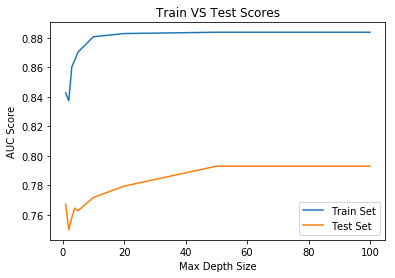

In [27]:
results  =  []
results2 = []
max_depth_size  = [1,2,3,4,5,10,20,50,100]

for depth in max_depth_size:
    model = RandomForestClassifier(depth, oob_score=True, n_jobs=-1, random_state=44)
    #model.fit(X, y)
    model.fit(X_train, y_train)
    print(depth, 'depth')
    pred = model.predict(X_train)
    pred2 = model.predict(X_test)
    roc1 = roc_auc_score(y_train, pred)
    roc2 = roc_auc_score(y_test, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    results.append(roc1)
    results2.append(roc2)
    print (" ")

plt.plot(max_depth_size, results, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('AUC Score')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

1 trees
AUC:  0.6886035313001605
 
2 trees
AUC:  0.7271268057784912
 
3 trees
AUC:  0.7415730337078652
 
4 trees
AUC:  0.7656500802568218
 
5 trees
AUC:  0.7720706260032103
 
15 trees
AUC:  0.826645264847512
 
20 trees
AUC:  0.8282504012841091
 
25 trees
AUC:  0.8202247191011236
 
40 trees
AUC:  0.8138041733547352
 
50 trees
AUC:  0.8170144462279294
 
70 trees
AUC:  0.8250401284109149
 
100 trees
AUC:  0.8170144462279294
 


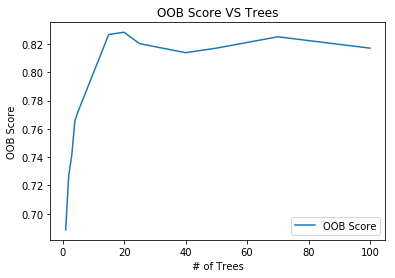

In [28]:
results = []
n_estimator_options = [1, 2, 3, 4, 5, 15, 20, 25, 40, 50, 70, 100]

for trees in n_estimator_options:
    model = RandomForestClassifier(trees, oob_score=True, random_state=42)
    #model.fit(X, y)
    model.fit(X_train, y_train)
    print(trees, 'trees')
    AUC = model.oob_score_
    print('AUC: ', AUC)
    results.append(AUC)
    print (" ")
    
plt.plot(n_estimator_options, results, label='OOB Score')
plt.xlabel('# of Trees')
plt.ylabel('OOB Score')
plt.title('OOB Score VS Trees')
plt.legend(loc="lower right")
plt.show()

auto option
AUC:  0.8330658105939005
 
None option
AUC:  0.826645264847512
 
sqrt option
AUC:  0.8330658105939005
 
log2 option
AUC:  0.8282504012841091
 
0.7 option
AUC:  0.8298555377207063
 
0.2 option
AUC:  0.8282504012841091
 
0.33 option
AUC:  0.8330658105939005
 


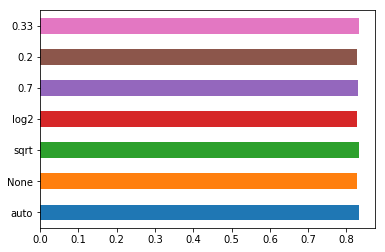

In [29]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.7, 0.2,0.33]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X_train, y_train)
    print(max_features, "option")
    auc = model.oob_score_
    print('AUC: ', auc)
    results.append(auc)
    print (" ")
    
pd.Series(results, max_features_options).plot(kind='barh')

1 min samples
AUC:  0.8330658105939005
 
2 min samples
AUC:  0.812199036918138
 
3 min samples
AUC:  0.8186195826645265
 
4 min samples
AUC:  0.8202247191011236
 
5 min samples
AUC:  0.8138041733547352
 
6 min samples
AUC:  0.8170144462279294
 
7 min samples
AUC:  0.8089887640449438
 
8 min samples
AUC:  0.8138041733547352
 
9 min samples
AUC:  0.8105939004815409
 
10 min samples
AUC:  0.8089887640449438
 
20 min samples
AUC:  0.7961476725521669
 


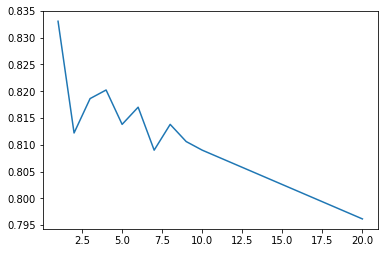

In [30]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    model.fit(X_train, y_train)
    print(min_samples, "min samples")
    auc = model.oob_score_
    print('AUC: ', auc)
    results.append(auc)
    print (" ")
    
pd.Series(results, min_samples_leaf_options).plot()

In [31]:
model_1.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1608637542, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1273642419, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_we

In [32]:
model_1.feature_importances_

array([0.13192244, 0.23384413, 0.10462667, 0.12502875, 0.07815698,
       0.10093911, 0.03744184, 0.18804007])

Pclass      0.131922
Sex         0.233844
Age         0.104627
Fare        0.125029
Cabin       0.078157
Embarked    0.100939
IsAlone     0.037442
Title       0.188040
dtype: float64


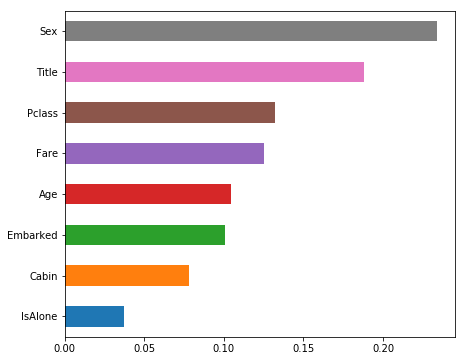

In [33]:
feature_importances = pd.Series(model_1.feature_importances_, index=X.columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

In [34]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.preprocessing import Imputer

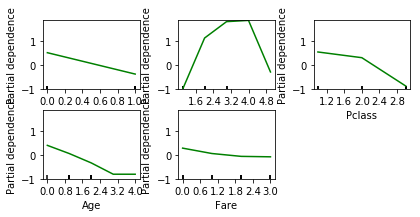

In [35]:
clf = GradientBoostingClassifier()
titanic_X_colns = ['Sex','Title','Pclass','Age', 'Fare']
titanic_X = X_train[titanic_X_colns]
my_imputer = Imputer()
imputed_titanic_X = my_imputer.fit_transform(titanic_X)

clf.fit(imputed_titanic_X, y_train)
titanic_plots = plot_partial_dependence(clf, features=['Sex','Title','Pclass','Age', 'Fare'], X=titanic_X, 
                                        feature_names=titanic_X_colns, grid_resolution=7)

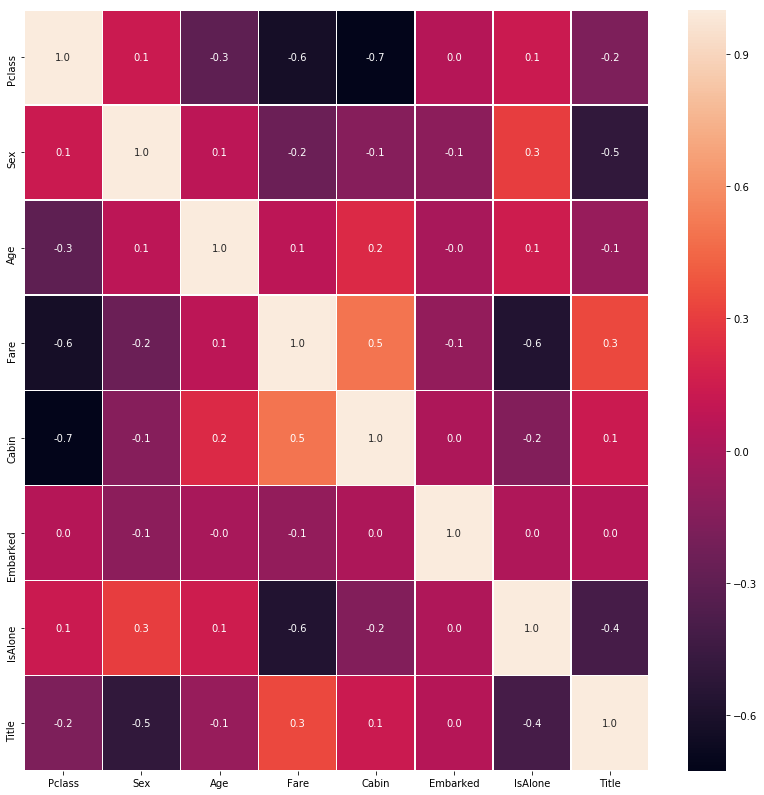

In [36]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

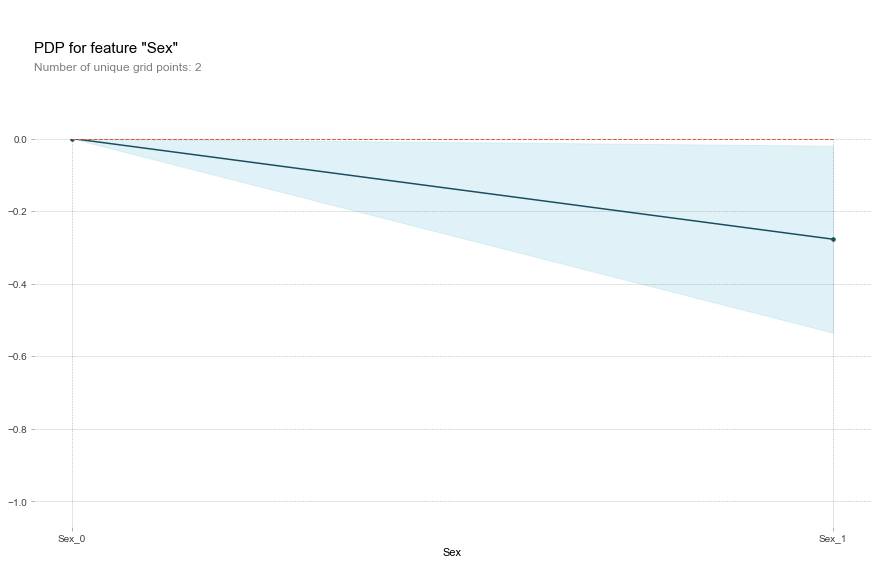

In [37]:
# !pip install pdpbox
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=model_1, dataset=X_train, model_features=X_train.columns, feature='Sex')

# plot it
pdp.pdp_plot(pdp_goals, 'Sex')
plt.show()

<p style="font-size: 32px;font-family: 'K2D',calibri; margin: 10px; color: #EE1C2F">Final model: Random Forest</p>

In [38]:
cols = ['Sex','Title','Pclass','Age','Fare']
X1 = X[cols]
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=40)

In [39]:
model_3 = RandomForestClassifier(max_depth = 10,criterion='gini', oob_score=True, n_estimators=1000 ,n_jobs=-1, random_state=44)
model_3 = model_3.fit(X_train, y_train)

In [40]:
# Calculate OOB Score
print("The OOB Score is: " + str(model_3.oob_score_))

The OOB Score is: 0.812199036918138


In [41]:
pred = model_3.predict(X_train)
pred2 = model_3.predict(X_test)
roc1 = roc_auc_score(y_train, pred)
roc2 = roc_auc_score(y_test, pred2)
print("ROC1: ",roc1, "ROC2:",roc2)

ROC1:  0.8160194711804403 ROC2: 0.8269230769230769


In [42]:
from sklearn.metrics import accuracy_score, log_loss
acc = accuracy_score(y_test, pred2)
acc

0.8395522388059702

In [43]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
model_4 = AdaBoostClassifier()
model_4.fit(X_train, y_train)
train_predictions = model_4.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)
model_5 = GradientBoostingClassifier()
model_5.fit(X_train, y_train)
train_predictions = model_5.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
print(acc)

0.7910447761194029
0.8432835820895522


In [44]:
sub_test = test[cols]
sub_pred = model_3.predict(sub_test)
Submission = pd.DataFrame({ 'PassengerId': PassengerId,
                            'Survived': sub_pred })
Submission.to_csv("Submission.csv", index=False)


<table class="tg">
  <tr>
    <th class="tg-0pky"></th>
    <th class="tg-0pky">OOB</th>
    <th class="tg-0pky">ROC1</th>
    <th class="tg-0pky">ROC2(T)</th>
    <th class="tg-0pky">ACC</th>
  </tr>
  <tr>
    <td class="tg-btxf">Baseline RF</td>
    <td class="tg-btxf">0.815</td>
    <td class="tg-btxf">0.880</td>
    <td class="tg-btxf">0.786</td>
    <td class="tg-btxf">0.791</td>
  </tr>
  <tr>
    <td class="tg-0pky">Improved RF</td>
    <td class="tg-0pky">0.812</td>
    <td class="tg-0pky">0.816</td>
    <td class="tg-0pky">0.826</td>
    <td class="tg-0pky" style="color:#EE1C2F">0.839</td>
  </tr>
    <tr>
    <td class="tg-btxf">ADA</td>
    <td class="tg-btxf">-</td>
    <td class="tg-btxf">-</td>
    <td class="tg-btxf">-</td>
    <td class="tg-btxf">0.791</td>
  </tr>
    <tr>
    <td class="tg-btxf">GBA</td>
    <td class="tg-btxf">-</td>
    <td class="tg-btxf">-</td>
    <td class="tg-btxf">-</td>
    <td class="tg-btxf" style="color:#EE1C2F">0.843</td>
  </tr>
</table>